In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [7]:
A=df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
A

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RoomService', ylabel='Density'>

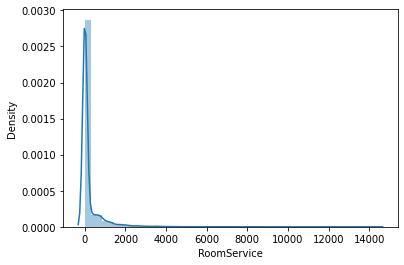

In [8]:
import seaborn as sns
sns.distplot(A['RoomService'])
# c=A['RoomService'].max()
# c

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FoodCourt', ylabel='Density'>

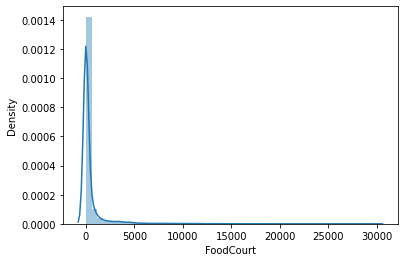

In [9]:
sns.distplot(A['FoodCourt'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ShoppingMall', ylabel='Density'>

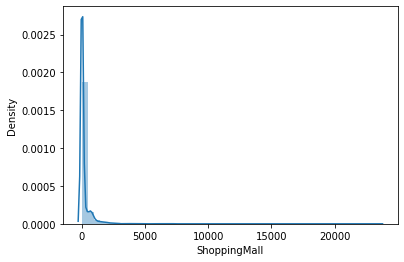

In [10]:
sns.distplot(A['ShoppingMall'])
# 	ShoppingMall	Spa	VRDeck

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spa', ylabel='Density'>

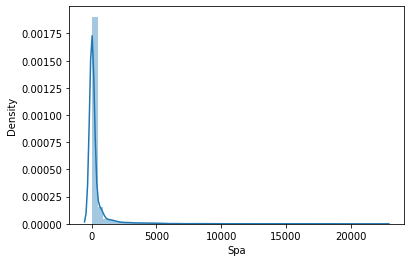

In [11]:
sns.distplot(A['Spa'])

In [12]:
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Home_Planet=A['HomePlanet'].array.reshape(-1, 1)
Home_Planet
imp_mf.fit(Home_Planet)
Home_Planet_transformed=imp_mf.transform(Home_Planet)
Home_Planet_imputed_final=pd.DataFrame(Home_Planet_transformed,columns=['HomePlanet'])
Home_Planet_imputed_final
Home_Planet_imputed_final.replace(to_replace=['Europa','Earth','Mars'], value=[1,2,3],inplace=True)
Home_Planet_imputed_final

,HomePlanet
0,1
1,2
2,1
3,1
4,2
...,...
8688,1
8689,2
8690,2
8691,1


In [13]:
imp_mf1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Cryo_Sleep=A['CryoSleep'].array.reshape(-1, 1)
imp_mf1.fit(Cryo_Sleep)
Cryo_Sleep_transformed=imp_mf1.transform(Cryo_Sleep)
Cryo_Sleep_imputed_final=pd.DataFrame(Cryo_Sleep_transformed,columns=['CryoSleep'])

Cryo_Sleep_imputed_final = Cryo_Sleep_imputed_final.astype(int)
Cryo_Sleep_imputed_final



,CryoSleep
0,0
1,0
2,0
3,0
4,0
...,...
8688,0
8689,1
8690,0
8691,0


In [14]:
from sklearn.impute import SimpleImputer
imp_mf2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Cabin_1=A['Cabin'].array.reshape(-1, 1)
Cabin_1
imp_mf2.fit(Cabin_1)
Cabin_1_transformed=imp_mf2.transform(Cabin_1)
Cabin_1_imputed_final=pd.DataFrame(Cabin_1_transformed,columns=['Cabin'])
Cabin_1_imputed_final.nunique()

Cabin    6560
dtype: int64

In [15]:
A['Cabin'].isnull().sum()

199

In [16]:
dummy1 = pd.get_dummies(Cabin_1_imputed_final, drop_first=True)
dummy1

,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,Cabin_A/104/S,Cabin_A/106/S,...,Cabin_G/996/S,Cabin_G/998/P,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Destination=A['Destination'].array.reshape(-1, 1)
imp_mf.fit(Destination)
Destination_transformed=imp_mf.transform(Destination)
Destination_transformed=pd.DataFrame(Destination_transformed,columns=['Destination'])
Destination_transformed.isnull().sum()

Destination    0
dtype: int64

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder()
enc1.fit(Destination_transformed)
Destination_transformed_final=enc1.transform(Destination_transformed)
Destination_Final_1=pd.DataFrame(Destination_transformed_final,columns=['Destination'])
Destination_Final_1

,Destination
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
8688,0.0
8689,1.0
8690,2.0
8691,0.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


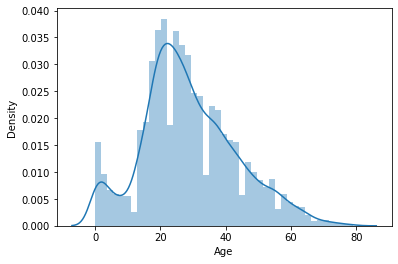

In [19]:
# from sklearn.impute import SimpleImputer
# imp_mf = SimpleImputer(missing_values=np.nan, strategy='mean')
# Age_1=A['Age'].array.reshape(-1, 1)

# imp_mf.fit(Age_1)
# Age_1_transformed=imp_mf.transform(Age_1)
# Age_final=pd.DataFrame(Age_1_transformed,columns=['Age'])
# Age_final

sns.distplot(A['Age'])
IQR =A['Age'].quantile(0.75)-A['Age'].quantile(0.25)
value=A['Age'].quantile(0.75)+(1.5*IQR)
Age_final=A['Age']=A['Age'].fillna(value)


In [20]:
imp_mf3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
VIP=A['VIP'].array.reshape(-1, 1)
imp_mf1.fit(VIP)
VIP_transformed=imp_mf1.transform(VIP)
VIP_imputed_final=pd.DataFrame(VIP_transformed,columns=['VIP'])

VIP_imputed_final = VIP_imputed_final.astype(int)
VIP_imputed_final

,VIP
0,0
1,0
2,1
3,0
4,0
...,...
8688,1
8689,0
8690,0
8691,0


In [21]:
rest=A[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
rest.isnull().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [22]:
for var in rest:
    IQR =rest[var].quantile(0.75)-rest[var].quantile(0.25)
    value=rest[var].quantile(0.75)+(1.5*IQR)
    rest[var]=rest[var].fillna(value)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
rest.isnull().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer
# imp_mf4 = SimpleImputer(missing_values=np.nan, strategy='mean')
# # Age_1=A['Age'].array.reshape(-1, 1)

# imp_mf4.fit(rest)
# rest_transformed=imp_mf4.transform(rest)
# rest_final=pd.DataFrame(rest_transformed,columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
# # rest_final
# # sns.distplot(rest_final['RoomService'])


In [ ]:
# # from sklearn.preprocessing import FunctionTransformer
# from feature_engine.missing_data_imputers import EndTailImputer
# imputer = EndTailImputer(distribution='skewed',tail='right',variables=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
# imputer.fit(rest)
# rest_final_transformed=imputer.transform(rest)
# rest_final_transformed


In [24]:


features = pd.concat([Home_Planet_imputed_final, Cryo_Sleep_imputed_final,dummy1,Destination_Final_1,Age_final,VIP_imputed_final,rest], axis=1)
features

,HomePlanet,CryoSleep,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,...,Cabin_T/2/S,Cabin_T/3/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,0,0,0,0,0,0,0,...,0,0,2.0,39.0,0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,2.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,2.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,2,1,0,0,0,0,0,0,0,0,...,0,0,1.0,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [25]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
transformer = FunctionTransformer(np.sqrt)
transformer.fit(features)
X_transformed=transformer.transform(features)
X_transformed


,HomePlanet,CryoSleep,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,...,Cabin_T/2/S,Cabin_T/3/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,6.244998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.898979,0.0,10.440307,3.000000,5.000000,23.430749,6.633250
2,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,7.615773,1.0,6.557439,59.799666,0.000000,81.945104,7.000000
3,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.744563,0.0,0.000000,35.818989,19.261360,57.697487,13.892444
4,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.000000,0.0,17.406895,8.366600,12.288206,23.769729,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,6.403124,1.0,0.000000,82.577237,0.000000,40.533936,8.602325
8689,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,4.242641,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8690,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.099020,0.0,0.000000,0.000000,43.266615,1.000000,0.000000
8691,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,5.656854,0.0,0.000000,32.388269,0.000000,18.788294,56.877060


In [26]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X_transformed).transform(X_transformed)
# X= preprocessing.RobustScaler(with_centering=False,with_scaling=True).fit(features).transform(features)
X

array([[-1.52494185e+00, -7.32770025e-01, -1.51698094e-02, ...,
        -5.05707632e-01, -4.95146813e-01, -4.80244400e-01],
       [ 1.50585824e-01, -7.32770025e-01, -1.51698094e-02, ...,
        -7.74708009e-02,  9.95384426e-01, -5.59288910e-02],
       [-1.52494185e+00, -7.32770025e-01,  6.59204066e+01, ...,
        -5.05707632e-01,  4.71773548e+00, -3.24686113e-02],
       ...,
       [ 1.50585824e-01, -7.32770025e-01, -1.51698094e-02, ...,
         3.19996401e+00, -4.31532490e-01, -4.80244400e-01],
       [-1.52494185e+00, -7.32770025e-01, -1.51698094e-02, ...,
        -5.05707632e-01,  7.00057806e-01,  3.15806568e+00],
       [-1.52494185e+00, -7.32770025e-01, -1.51698094e-02, ...,
        -5.05707632e-01, -4.95146813e-01, -2.58652852e-01]])

In [27]:
y=A['Transported']

y = y.astype(int)


In [28]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=2)
# model.fit(X, y)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42,C=10).fit(X,y)
print(model.score(X,y))
# from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(n_neighbors=2)
# neigh.fit(X, y)
# print(model.score(X,y))

# from sklearn.tree import DecisionTreeClassifier
# tree=DecisionTreeClassifier(random_state=0)
# tree.fit(X,y)
# print(model.score(X,y))

# # print(model.score(X,y))

0.9695157022891983


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
test_df=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_df.columns.values
test_df.isnull().sum()
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [30]:
B=test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
B

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [31]:
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Home_Planet=B['HomePlanet'].array.reshape(-1, 1)
Home_Planet
imp_mf.fit(Home_Planet)
Home_Planet_transformed=imp_mf.transform(Home_Planet)
Home_Planet_imputed_final=pd.DataFrame(Home_Planet_transformed,columns=['HomePlanet'])

Home_Planet_imputed_final.replace(to_replace=['Europa','Earth','Mars'], value=[1,2,3],inplace=True)
Home_Planet_imputed_final

,HomePlanet
0,2
1,2
2,1
3,1
4,2
...,...
4272,2
4273,2
4274,3
4275,1


In [32]:
imp_mf1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Cryo_Sleep=B['CryoSleep'].array.reshape(-1, 1)
imp_mf1.fit(Cryo_Sleep)
Cryo_Sleep_transformed=imp_mf1.transform(Cryo_Sleep)
Cryo_Sleep_imputed_final=pd.DataFrame(Cryo_Sleep_transformed,columns=['CryoSleep'])

Cryo_Sleep_imputed_final = Cryo_Sleep_imputed_final.astype(int)
Cryo_Sleep_imputed_final

,CryoSleep
0,1
1,0
2,1
3,0
4,0
...,...
4272,1
4273,0
4274,1
4275,0


In [33]:
from sklearn.impute import SimpleImputer
imp_mf2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Cabin_1=B['Cabin'].array.reshape(-1, 1)
Cabin_1
imp_mf2.fit(Cabin_1)
Cabin_1_transformed=imp_mf2.transform(Cabin_1)
Cabin_1_imputed_final=pd.DataFrame(Cabin_1_transformed,columns=['Cabin'])
Cabin_1_imputed_final


,Cabin
0,G/3/S
1,F/4/S
2,C/0/S
3,C/1/S
4,F/5/S
...,...
4272,G/1496/S
4273,G/160/P
4274,D/296/P
4275,D/297/P


In [34]:
dummy2 = pd.get_dummies(Cabin_1_imputed_final, drop_first=True)
dummy2


        

,Cabin_A/105/S,Cabin_A/108/S,Cabin_A/109/S,Cabin_A/11/P,Cabin_A/12/P,Cabin_A/12/S,Cabin_A/13/S,Cabin_A/15/P,Cabin_A/15/S,Cabin_A/17/P,...,Cabin_G/993/P,Cabin_G/994/P,Cabin_G/995/P,Cabin_G/996/P,Cabin_G/997/P,Cabin_G/997/S,Cabin_T/0/S,Cabin_T/1/S,Cabin_T/3/S,Cabin_T/4/P
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# enc.fit(Cabin_1_imputed_final)
# Cabin_Final=enc.transform(Cabin_1_imputed_final)
# Cabin_Final_1=pd.DataFrame(Cabin_Final,columns=['Çabin'])
# Cabin_Final_1

In [35]:
from sklearn.impute import SimpleImputer
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Destination=B['Destination'].array.reshape(-1, 1)
imp_mf.fit(Destination)
Destination_transformed=imp_mf.transform(Destination)
Destination_transformed=pd.DataFrame(Destination_transformed,columns=['Destination'])
Destination_transformed.isnull().sum()

Destination    0
dtype: int64

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc1 = OrdinalEncoder()
enc1.fit(Destination_transformed)
Destination_transformed_final=enc1.transform(Destination_transformed)
Destination_Final_1=pd.DataFrame(Destination_transformed_final,columns=['Destination'])
Destination_Final_1

,Destination
0,2.0
1,2.0
2,0.0
3,2.0
4,2.0
...,...
4272,2.0
4273,2.0
4274,0.0
4275,2.0


In [37]:
# from sklearn.impute import SimpleImputer
# imp_mf = SimpleImputer(missing_values=np.nan, strategy='mean')
# Age_1=B['Age'].array.reshape(-1, 1)

# imp_mf.fit(Age_1)
# Age_1_transformed=imp_mf.transform(Age_1)
# Age_final=pd.DataFrame(Age_1_transformed,columns=['Age'])
# Age_final
IQR =B['Age'].quantile(0.75)-B['Age'].quantile(0.25)
value=B['Age'].quantile(0.75)+(1.5*IQR)
Age_final=B['Age']=B['Age'].fillna(value)
Age_final

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0       27.0
1       19.0
2       31.0
3       38.0
4       20.0
        ... 
4272    34.0
4273    42.0
4274    64.0
4275    64.0
4276    43.0
Name: Age, Length: 4277, dtype: float64

In [38]:
imp_mf3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
VIP=B['VIP'].array.reshape(-1, 1)
imp_mf1.fit(VIP)
VIP_transformed=imp_mf1.transform(VIP)
VIP_imputed_final=pd.DataFrame(VIP_transformed,columns=['VIP'])

VIP_imputed_final = VIP_imputed_final.astype(int)
VIP_imputed_final

,VIP
0,0
1,0
2,0
3,0
4,0
...,...
4272,0
4273,0
4274,0
4275,0


In [39]:
rest=B[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
rest.isnull().sum()

RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [40]:
for var in rest:
    IQR =rest[var].quantile(0.75)-rest[var].quantile(0.25)
    value=rest[var].quantile(0.75)+(1.5*IQR)
    rest[var]=rest[var].fillna(value)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
rest.isnull().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
# from sklearn.impute import SimpleImputer
# imp_mf4 = SimpleImputer(missing_values=np.nan, strategy='mean')
# # Age_1=A['Age'].array.reshape(-1, 1)

# imp_mf4.fit(rest)
# rest_transformed=imp_mf4.transform(rest)
# rest_final=pd.DataFrame(rest_transformed,columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
# rest_final

In [42]:
features = pd.concat([Home_Planet_imputed_final, Cryo_Sleep_imputed_final,dummy2,Destination_Final_1,Age_final,VIP_imputed_final,rest], axis=1)
features

,HomePlanet,CryoSleep,Cabin_A/105/S,Cabin_A/108/S,Cabin_A/109/S,Cabin_A/11/P,Cabin_A/12/P,Cabin_A/12/S,Cabin_A/13/S,Cabin_A/15/P,...,Cabin_T/3/S,Cabin_T/4/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,1,0,0,0,0,0,0,0,0,...,0,0,2.0,27.0,0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,2.0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,1,0,0,0,0,0,0,0,0,...,0,0,2.0,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,2,0,0,0,0,0,0,0,0,0,...,0,0,2.0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,3,1,0,0,0,0,0,0,0,0,...,0,0,0.0,64.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,0,0,0,0,0,0,0,0,...,0,0,2.0,64.0,0,0.0,2680.0,0.0,0.0,523.0


In [43]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
transformer = FunctionTransformer(np.sqrt)
transformer.fit(features)
X_transformed=transformer.transform(features)
X_transformed

,HomePlanet,CryoSleep,Cabin_A/105/S,Cabin_A/108/S,Cabin_A/109/S,Cabin_A/11/P,Cabin_A/12/P,Cabin_A/12/S,Cabin_A/13/S,Cabin_A/15/P,...,Cabin_T/3/S,Cabin_T/4/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.196152,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.358899,0.0,0.000000,3.000000,0.000000,53.131911,0.000000
2,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,5.567764,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,6.164414,0.0,0.000000,81.559794,0.000000,13.453624,24.186773
4,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.472136,0.0,3.162278,0.000000,25.199206,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.830952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4273,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,6.480741,0.0,0.000000,29.103264,4.123106,3.162278,12.000000
4274,1.732051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4275,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,8.000000,0.0,0.000000,51.768716,0.000000,0.000000,22.869193


In [ ]:
# from sklearn import preprocessing
# X_test= preprocessing.StandardScaler().fit(features).transform(features)
# X_test

In [44]:
from sklearn import preprocessing
X_test= preprocessing.StandardScaler().fit(X_transformed).transform(X_transformed)
X_test

array([[ 0.11435947,  1.33044268, -0.02162952, ..., -0.51210587,
        -0.49390451, -0.45864603],
       [ 0.11435947, -0.75162953, -0.02162952, ..., -0.51210587,
         2.93401347, -0.45864603],
       [-1.55941783,  1.33044268, -0.02162952, ..., -0.51210587,
        -0.49390451, -0.45864603],
       ...,
       [ 1.39869396,  1.33044268, -0.02162952, ..., -0.51210587,
        -0.49390451, -0.45864603],
       [-1.55941783, -0.75162953, -0.02162952, ..., -0.51210587,
        -0.49390451,  0.97827968],
       [ 0.11435947,  1.33044268, -0.02162952, ..., -0.51210587,
        -0.49390451, -0.45864603]])

In [45]:
X, X_test = dummy1.align(dummy2, join='left', axis=1)
X_test=X_test.fillna(0)
X_test

,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,Cabin_A/104/S,Cabin_A/106/S,...,Cabin_G/996/S,Cabin_G/998/P,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/0/P,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/2/S,Cabin_T/3/P
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
features = pd.concat([Home_Planet_imputed_final, Cryo_Sleep_imputed_final,X_test,Destination_Final_1,Age_final,VIP_imputed_final,rest], axis=1)
features

,HomePlanet,CryoSleep,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,...,Cabin_T/2/S,Cabin_T/3/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,27.0,0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,64.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,64.0,0,0.0,2680.0,0.0,0.0,523.0


In [47]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
transformer = FunctionTransformer(np.sqrt)
transformer.fit(features)
X_transformed=transformer.transform(features)
X_transformed

,HomePlanet,CryoSleep,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,Cabin_A/103/S,...,Cabin_T/2/S,Cabin_T/3/P,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.196152,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.358899,0.0,0.000000,3.000000,0.000000,53.131911,0.000000
2,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,5.567764,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,6.164414,0.0,0.000000,81.559794,0.000000,13.453624,24.186773
4,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,4.472136,0.0,3.162278,0.000000,25.199206,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,5.830952,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4273,1.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,6.480741,0.0,0.000000,29.103264,4.123106,3.162278,12.000000
4274,1.732051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4275,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.414214,8.000000,0.0,0.000000,51.768716,0.000000,0.000000,22.869193


In [48]:
from sklearn import preprocessing
X_test_final= preprocessing.StandardScaler().fit(X_transformed).transform(X_transformed)
X_test_final

array([[ 0.11435947,  1.33044268,  0.        , ..., -0.51210587,
        -0.49390451, -0.45864603],
       [ 0.11435947, -0.75162953,  0.        , ..., -0.51210587,
         2.93401347, -0.45864603],
       [-1.55941783,  1.33044268,  0.        , ..., -0.51210587,
        -0.49390451, -0.45864603],
       ...,
       [ 1.39869396,  1.33044268,  0.        , ..., -0.51210587,
        -0.49390451, -0.45864603],
       [-1.55941783, -0.75162953,  0.        , ..., -0.51210587,
        -0.49390451,  0.97827968],
       [ 0.11435947,  1.33044268,  0.        , ..., -0.51210587,
        -0.49390451, -0.45864603]])

In [49]:
predictions = model.predict(X_test_final)
# predictions = predictions.astype(int)
# predictions = np.char.replace(predictions,'0','False')
# # predictions = np.char.replace(predictions,'1','True')
# predictions[predictions=='1']='True'
predictions=pd.DataFrame(predictions,columns=['Transported'])

predictions[predictions == 1] = 'True'
predictions[predictions == 0] = 'False'
predictions=predictions.to_numpy()
predictions

array([['True'],
       ['False'],
       ['True'],
       ...,
       ['True'],
       ['True'],
       ['True']], dtype=object)

In [50]:
# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Transported': predictions})
# output
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")
test_df['Transported']=predictions
test_df = test_df.loc[:, ['PassengerId', 'Transported']]


test_df.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
my_submission=pd.read_csv("submission.csv")
# my_submission


Your submission was successfully saved!
